<a href="https://colab.research.google.com/github/ManueloRZ2/MiniProyecto/blob/master/Miniproyecto1(com1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TRATAMIENTO DE SEÑALES III**

**MINIPROYECTO 1: ANALISIS DE BIO-SEÑALES PARA LA COMUNICACIÓN AFECTIVA**


LEIDY KATHERINE RIOS ECHAVARRIA

EMMANUEL ARANGO ARBELAÉZ

JUAN CAMILO JOJOA SANCHÉZ



## Cargar bases de datos de computación afectiva


La base de datos [DEAP](http://www.eecs.qmul.ac.uk/mmv/datasets/deap/index.html) es un conjunto de datos multimodal para el análisis de los estados afectivos humanos. El electroencefalograma (EEG) y las señales fisiológicas periféricas de 32 participantes se registraron mientras cada uno miraba 40 extractos de videos musicales de un minuto de duración. Los participantes calificaron cada video en términos de niveles de excitación (arousal), valencia, me gusta / no me gusta, dominio y familiaridad. Para 22 de los 32 participantes, también se grabó un video de cara frontal. Se utilizó un método novedoso para la selección de estímulos, utilizando la recuperación por etiquetas afectivas del sitio web last.fm, detección de videos destacados y una herramienta de evaluación en línea.

## Etiquetas emocionales

Cada una de las realizaciones induce una emoción en los sujetos. Por lo tanto cada realización (de las 40) tiene sus correspondientes etiquetas de la forma:

Los modelos dimensionales sugieren que la emoción se entiende mejor cuando ocurre dentro de un espacio dimensional, más comúnmente un espacio bidimensional que abarca la valencia y la excitación. La valencia emocional describe el grado en que una emoción es positiva o negativa, mientras que la excitación se refiere a su intensidad, es decir, la fuerza del estado emocional asociado.

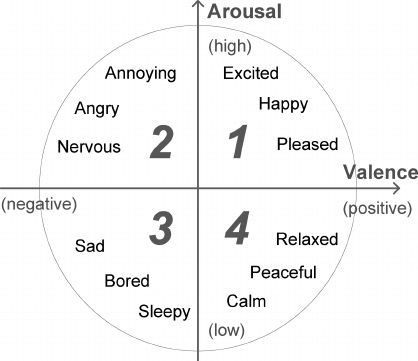

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

ruta = '/content/drive/Shared drives/Sx3/'
fileName = 's15.mat'
db = sio.loadmat(ruta+fileName)
db

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Aug 21 08:32:28 2013',
 '__version__': '1.0',
 'data': array([[[-4.17881751e+00, -1.13304735e-01, -7.67947166e+00, ...,
          -7.44169079e-01, -2.11979605e+00,  1.68879500e+00],
         [ 4.95393351e+00,  2.74700385e+00, -4.05817500e+00, ...,
           7.62460334e-02,  6.84584676e-01,  4.53211096e+00],
         [-1.00720621e+01,  1.53730641e+00,  1.06900747e+00, ...,
           7.92967705e+00,  3.47528178e+00,  2.03442597e-01],
         ...,
         [ 4.72890288e+03,  4.70509043e+03,  4.64321554e+03, ...,
          -1.19698163e+04, -1.20322536e+04, -1.21092848e+04],
         [-9.26052387e+03, -9.45534513e+03, -9.65553739e+03, ...,
          -2.03975616e+04, -2.02920945e+04, -2.02388726e+04],
         [ 2.14919121e-02,  2.14919121e-02,  2.14919121e-02, ...,
           2.44918736e-02,  2.34918864e-02,  2.34918864e-02]],
 
        [[ 2.38163910e+01, -8.09708606e-01, -1.21807861e+01, ...,
  

In [ ]:
X = db['data']
X.shape

(40, 40, 6528)

**Señales GSR:**La respuesta galvánica de la piel (GSR), también denominada actividad electrodérmica (EDA) y conductancia de la piel (SC), es la medida de las continuas variaciones en las características eléctricas de la piel, por ejemplo la conductancia, causada por la variación de la sudoración del cuerpo humano. De esta forma, la conductancia de la piel puede ser una medida de las respuestas del Sistema Nervioso Simpático humano. Tal sistema está directamente involucrado en la regulación del comportamiento emocional en los humanos. La señal GSR es muy fácil de registrar: en general sólo son necesarios dos electrodos colocados en el segundo y tercer dedo de una mano. La variación de una corriente aplicada de bajo voltaje entre los dos electrodos se utiliza como medida de la actividad electrodérmica (EDA).




(6528,)


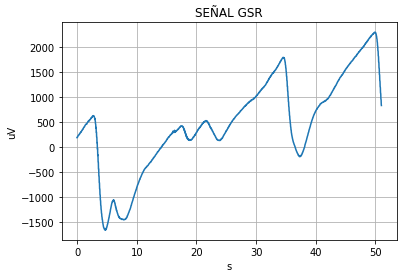

In [ ]:
trial = 20 # video u observación 
channel = 37 # canal de la señal fisiológica
GSR = X[trial-1,channel-1,:]
print(GSR.shape)
ts = len(GSR)/128.
time = np.linspace(0,ts,len(GSR))

plt.plot(time,GSR) 
plt.grid()
plt.title("SEÑAL GSR")
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

In [ ]:
labels = db['labels']
print(labels)

[[8.9  5.86 7.26 8.04]
 [5.04 4.06 5.03 6.09]
 [8.04 5.   7.06 9.  ]
 [8.04 3.96 6.04 8.04]
 [9.   7.15 9.   9.  ]
 [9.   5.13 8.01 8.95]
 [5.04 3.06 5.95 5.01]
 [9.   5.04 9.   7.05]
 [9.   5.06 6.99 8.03]
 [4.99 5.04 7.06 5.95]
 [8.99 5.01 7.26 9.  ]
 [7.08 2.99 6.06 6.13]
 [7.06 4.04 6.   8.05]
 [8.15 3.95 7.03 9.  ]
 [8.12 4.03 9.   7.05]
 [4.17 2.95 4.03 6.06]
 [8.1  2.96 7.04 8.12]
 [7.04 4.05 6.96 7.05]
 [7.04 3.01 6.08 7.  ]
 [7.97 5.06 7.06 9.  ]
 [3.09 3.14 3.13 4.1 ]
 [4.12 2.04 4.06 3.96]
 [3.05 4.12 2.88 4.03]
 [1.92 6.05 2.92 8.01]
 [2.96 5.04 2.95 8.  ]
 [4.96 3.04 2.95 6.  ]
 [6.   4.14 5.17 8.06]
 [4.01 4.97 4.04 7.04]
 [4.05 6.08 4.01 8.  ]
 [2.04 6.99 4.03 6.95]
 [2.99 4.01 3.03 2.95]
 [3.97 6.05 3.1  1.  ]
 [3.01 4.01 4.13 1.  ]
 [3.01 7.13 2.97 1.  ]
 [5.05 6.91 5.03 2.1 ]
 [3.96 5.   4.08 2.03]
 [3.04 5.04 1.9  1.  ]
 [2.08 7.03 1.03 1.  ]
 [4.   5.03 2.01 1.  ]
 [4.01 7.12 1.04 2.12]]


In [ ]:
#Media de la señal GSR

media=np.mean(GSR, axis=0)
print("media de la señal GSR [Respuesta Galvánica de la piel]: ",media)

media de la señal GSR [Respuesta Galvánica de la piel]:  472.376670720041


media de la señal GSR [Respuesta Galvánica de la piel]:  [ 0.6114232   5.15436936  4.84865776 ... -8.86148208 -8.36902352
  0.        ]
Proporción de negativos en la derivada respecto a la cantidad de muestras: 20.572916666666664 %


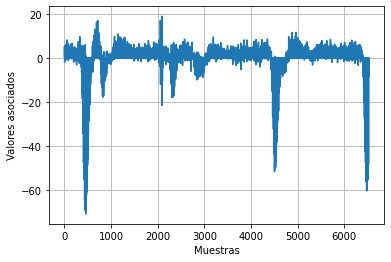

In [ ]:
#Derivada de la señal GSR
DerivGSR= np.gradient(GSR)
print("media de la señal GSR [Respuesta Galvánica de la piel]: ",DerivGSR)
plt.plot(DerivGSR)
plt.xlabel('Muestras')
plt.ylabel('Valores asociados')
plt.grid()

negativos=0

for i in DerivGSR:
  if i<0:
    negativos=negativos + 1

Propor=negativos/len(DerivGSR)
print("Proporción de negativos en la derivada respecto a la cantidad de muestras:",Propor*100,"%")
  

In [ ]:
#Media de la derivada de la señal GSR

media=np.mean(DerivGSR, axis=0)
print("Media de la derivada de la señal GSR [Respuesta Galvánica de la piel]: ",media)

Media de la derivada de la señal GSR [Respuesta Galvánica de la piel]:  -0.23182545629582613


**PLETHIMOGRAPH:**

**PATTERN RESPIRATION:**El patrón de respiración se hace por medio de una Respiration belt, que es una banda que mide la frecuencia respiratoria de la persona. En este experimento se usa para saber como se comporta la frecuencia cardiaca de la persona a medida que observa un vídeo.

(6528,)


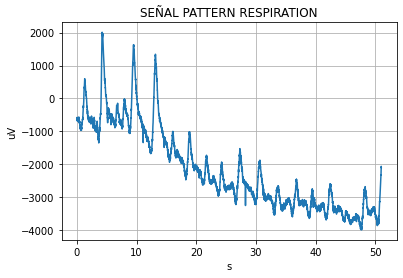

In [ ]:
trial = 20 # video u observación 
channel = 38 # canal de la señal fisiológica
PR = X[trial-1,channel-1,:]
print(PR.shape)
ts = len(PR)/128.
time = np.linspace(0,ts,len(PR))

plt.plot(time,PR) 
plt.grid()
plt.title("SEÑAL PATTERN RESPIRATION")
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

In [ ]:
#Media de la señal PATTERN RESPIRATION

media1=np.mean(PR, axis=0)
print("media de la señal PATTERN RESPIRATION: ",media1)

media de la señal PATTERN RESPIRATION:  -2133.215492907868


media de la señal PATTERN RESPIRATION:  [-24.24995519 -24.90620398  -3.60936833 ...  41.64054806  33.84368747
 -31.46869185]


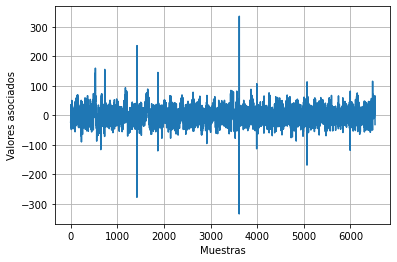

In [ ]:
#Derivada de la señal PATTERN RESPIRATION
DerivPR= np.gradient(PR)
print("media de la señal PATTERN RESPIRATION: ",DerivPR)
plt.plot(DerivPR)
plt.xlabel('Muestras')
plt.ylabel('Valores asociados')
plt.grid()

In [ ]:
#Media de la derivada de la señal PATTERN RESPIRATION

media2=np.mean(DerivPR, axis=0)
print("media de la derivada de la señal PATTERN RESPIRATION: ",media2)

media de la derivada de la señal PATTERN RESPIRATION:  -0.23182545629582613


In [ ]:
#Desviación estandar de la señal PATTERN RESPIRATION
import statistics

desPR=statistics.stdev(PR)
print("Desviación estandar de la señal PATTERN RESPIRATION: ",desPR)


Desviación estandar de la señal PATTERN RESPIRATION:  1271.5842631214387


**Señales EMG:**Es la captación de las señales eléctricas producidas por los músculos durante una contracción muscular se conoce como electromiografía. Estas señales son generadas por el intercambio de iones a través de las membranas de las fibras musculares debido a una contracción muscular.La electromiografía (EMG) consiste básicamente en la adquisición, registro y análisis de la actividad eléctrica generada en nervios y músculos a través de la utilización de electrodos (superficiales, de aguja, implantados). Las mediciones extraídas de EMG proporcionan una información valiosa acerca de la fisiología y los patrones de activación muscular.

(6528,)


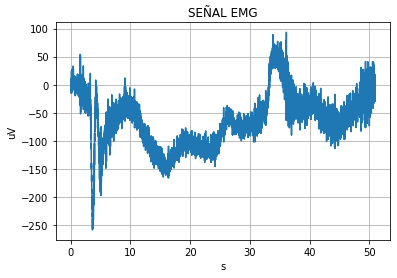

In [ ]:
trial = 20 # video u observación 
channel = 35 # canal de la señal fisiológica
EMG = X[trial-1,channel-1,:]
print(EMG.shape)
ts = len(EMG)/128.
time = np.linspace(0,ts,len(EMG))

plt.plot(time,EMG) 
plt.grid()
plt.title("SEÑAL EMG")
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

In [ ]:
#Frecuencia de parpadeo de los ojos


In [ ]:
#Energía de la señal

In [ ]:
#Media y Varianza de la señal EMG

media=np.mean(EMG, axis=0)
print("media  de la señal EMG: ",media)

varianza=np.var(EMG)
print("varianza de la señal EMG: ",varianza)


media  de la señal EMG:  -65.24284724030987
varianza de la señal EMG:  2284.756715888894


**SEÑALES EOG:**El electrooculograma es un instrumento de diagnóstico que se utiliza en oftalmología para estudiar el movimiento de los músculos del ojo. Este examen registra la diferencia de potencia que existe entre la córnea y la retina, además de medir las variaciones eléctricas que se producen en el ojo al realizar un movimiento sacádico. El electrooculograma consiste en colocar pequeños electrodos en zonas cercanas a los músculos de los ojos con el objetivo de medir sus movimientos, el electrooculograma toma como valor de referencia la diferencia de potencia entre la retina y la córnea. Por lo general, existe una diferencia de 0,4 a 5 mV entre la potencia de la córnea y la membrana de Bruch, que se halla en el segmento posterior del ojo. Ésta se origina en el epitelio pigmentario de la retina y permite hallar un dipolo, donde la córnea se considera el lado positivo y la retina el lado negativo. El potencial producido por el dipolo es susceptible a los sistemas de registro unipolares y bipolares, y puede ser identificado mediante la colocación de los electrodos en la piel cercana a los ojos.

(6528,)


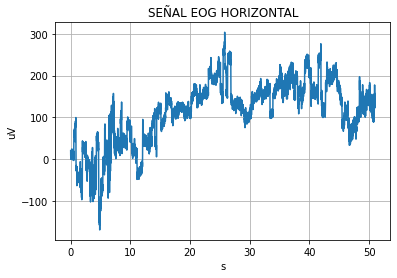

In [ ]:
#Señal EOG HORIZONTAL
trial = 20 # video u observación 
channel = 33 # canal de la señal fisiológica
EOGH = X[trial-1,channel-1,:]
print(EOGH.shape)
ts = len(EOGH)/128.
time = np.linspace(0,ts,len(EOGH))

plt.plot(time,EOGH) 
plt.grid()
plt.title("SEÑAL EOG HORIZONTAL")
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

In [ ]:
#Frecuencia de parpadeo de los ojos

In [ ]:
#Energía d ela señal EOG HORIZONTAL

In [ ]:
#Media y Varianza de la señal EOG HORIZONTAL

media=np.mean(EOGH, axis=0)
print("media  de la señal EOG HORIZONTAL: ",media)

varianza=np.var(EOGH)
print("varianza de la señal  EOG HORIZONTAL: ",varianza)

media  de la señal EOG HORIZONTAL:  113.02630674278272
varianza de la señal  EOG HORIZONTAL:  5781.0221818489945


(6528,)


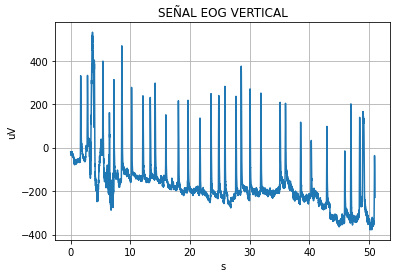

In [ ]:
#Señal EOG VERTICAL
trial = 20 # video u observación 
channel = 34 # canal de la señal fisiológica
EOGV = X[trial-1,channel-1,:]
print(EOGV.shape)
ts = len(EOGV)/128.
time = np.linspace(0,ts,len(EOGV))

plt.plot(time,EOGV) 
plt.grid()
plt.title("SEÑAL EOG VERTICAL")
plt.ylabel('uV')
plt.xlabel('s')
plt.show()

In [ ]:
#Frecuencia de parpadeo de los ojos

In [ ]:
#Energía de la señal EOG VERTICAL

In [ ]:
#Media y Varianza de la señal EOG VERTICAL

media=np.mean(EOGV, axis=0)
print("media  de la señal EOG VERTICALL: ",media)

varianza=np.var(EOGV)
print("varianza de la señal  EOG VERTICAL: ",varianza)

media  de la señal EOG VERTICALL:  -166.32227425009128
varianza de la señal  EOG VERTICAL:  15409.047512875743


**SEÑALES EEG:**La electroencefalografía (EEG) es una exploración neurofisiológica que se basa en el registro de la actividad bioeléctrica cerebral en condiciones basales de reposo, en vigilia o sueño, y durante diversas activaciones.*El* análisis en el dominio de la frecuencia se realiza utilizando el algoritmo de Transformada Rápida de Fourier (FFT) (con una resolución de 0,125 Hz) para calcular la densidad de potencia absoluta (μV2 / Hz), la densidad de potencia relativa (%) y la frecuencia media (Hz) dentro de cada una de las subbandas. La potencia absoluta de una banda es la integral de todos los valores de potencia dentro de su rango de frecuencia. Los índices de potencia relativa (RP) para cada banda se encuentran expresando la potencia absoluta en cada banda de frecuencia como un porcentaje de la potencia absoluta (AP) sumada en las cuatro bandas de frecuencia. Para las medidas de asimetría de potencia inter-hemisférica (absoluta) para cada banda para siete sitios homólogos (AF3-AF4, F7-F8, F3-F4, FC5-FC6, T7-T8, P7-P8, O1-O2) y un conjunto adicional de diez pares de sitios de electrodos (AF3-F3, AF4-F4, F3-O1, F4-O2, FC5-P7, FC6-P8, P7-O1, P8-O2, T7-O1, T8-O2). Los índices de asimetría del hemisferio derecho (R) frente al hemisferio izquierdo (L) (R-L) se calcularon con la fórmula [(R-L) / (R + L)]. Para la simetría intra-hemisférica, las relaciones de valor anterior (A) (frontal) vs. posterior (P) (posterior) (A-P) para cada par de electrodos se derivaron con la fórmula [(A-P) / (A + P)]. Las variables de EEG de potencia absoluta y asimetría se pueden transformar logarítmicamente (log (χ)) y las variables de potencia relativa se pueden transformar mediante log [χ ÷ (1 - χ)] con el fin de normalizar la distribución de los datos [63-65].

In [ ]:
#Electrodos de la señal EEG

trial = 20 # video u observación 
channel = 1 # canal de la señal EEG FP1
FP1 = X[trial-1,channel-1,:]

channel = 17 # canal de la señal EEG FP2
FP2 = X[trial-1,channel-1,:]

channel = 2 # canal de la señal EEG AF3
AF3 = X[trial-1,channel-1,:]

channel = 18 # canal de la señal EEG AF4
AF4 = X[trial-1,channel-1,:]

channel = 4 # canal de la señal EEG F7
F7 = X[trial-1,channel-1,:]

channel = 21 # canal de la señal EEG F8
F8 = X[trial-1,channel-1,:]

channel = 5 # canal de la señal EEG FC5
FC5 = X[trial-1,channel-1,:]

channel = 22 # canal de la señal EEG FC6
FC6 = X[trial-1,channel-1,:]

channel = 6 # canal de la señal EEG FC1
FC1 = X[trial-1,channel-1,:]

channel = 23 # canal de la señal EEG FC2
FC2 = X[trial-1,channel-1,:]

channel = 7 # canal de la señal EEG C3
C3 = X[trial-1,channel-1,:]

channel = 25 # canal de la señal EEG C4
C4 = X[trial-1,channel-1,:]

channel = 8 # canal de la señal EEG T7
T7 = X[trial-1,channel-1,:]

channel = 26 # canal de la señal EEG T8
T8 = X[trial-1,channel-1,:]

channel = 11 # canal de la señal EEG P3
P3 = X[trial-1,channel-1,:]

channel = 29 # canal de la señal EEG P4
P4 = X[trial-1,channel-1,:]

channel = 14 # canal de la señal EEG O1
O1 = X[trial-1,channel-1,:]

channel = 32 # canal de la señal EEG O2
02 = X[trial-1,channel-1,:]

channel = 1 # canal de la señal EEG FP1
F3 = X[trial-1,channel-1,:]